# Partha Sarathi M

## Data Science and Business Analytics Internship

### Task 1 - Predicting the percentage of a student based on study hours

### Dataset:  http://bit.ly/w-data

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [76]:
df.shape

(25, 2)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [78]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


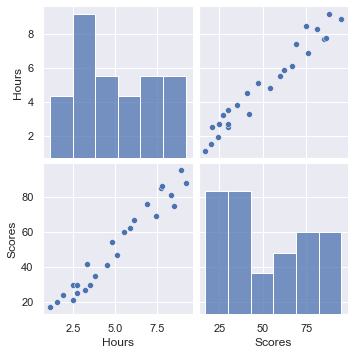

In [79]:
sns.pairplot(df)

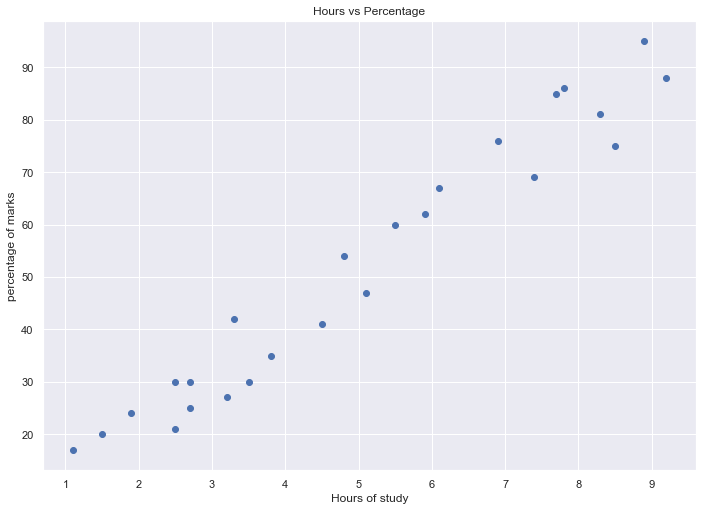

In [80]:
plt.scatter(df['Hours'], df['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours of study')
plt.ylabel('percentage of marks')
plt.show()
     

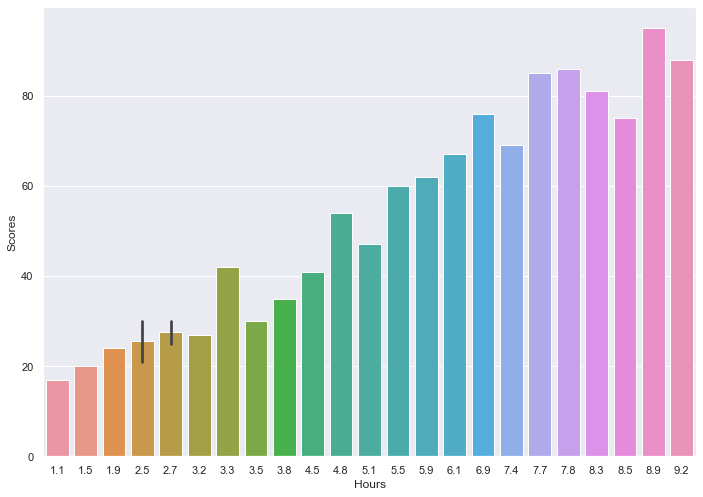

In [81]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
res = sns.barplot(x=df['Hours'], y=df['Scores'])
plt.show()

In [82]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [83]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=6) 

In [84]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [85]:
lr.fit(X_train, y_train)

LinearRegression()

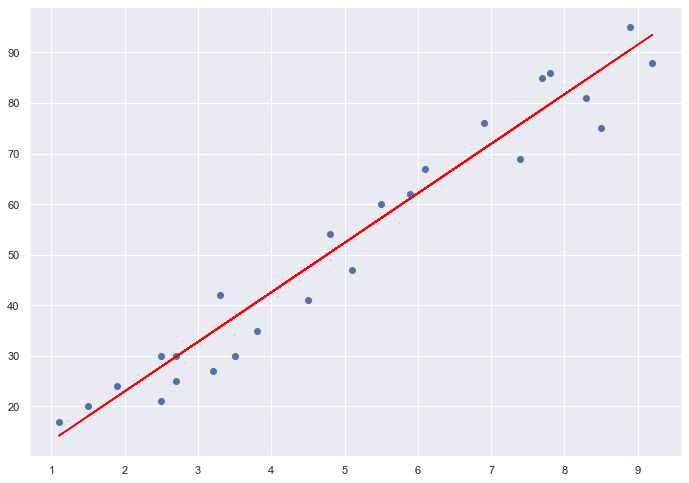

In [86]:
line = lr.coef_*X+lr.intercept_
plt.scatter(X, y)
plt.plot(X, line,color = 'red');
plt.show()

In [87]:
y_pred = lr.predict(X_test)
print(y_pred)

[40.59959726 57.24380354 18.08096524 93.46942896 84.65779035 34.72517152
 27.87167482]


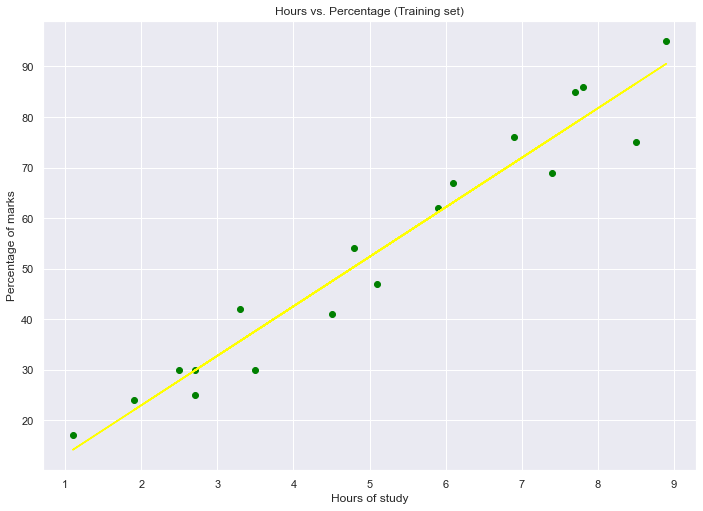

In [66]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, lr.predict(X_train), color = 'yellow')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours of study')
plt.ylabel('Percentage of marks')
plt.show()

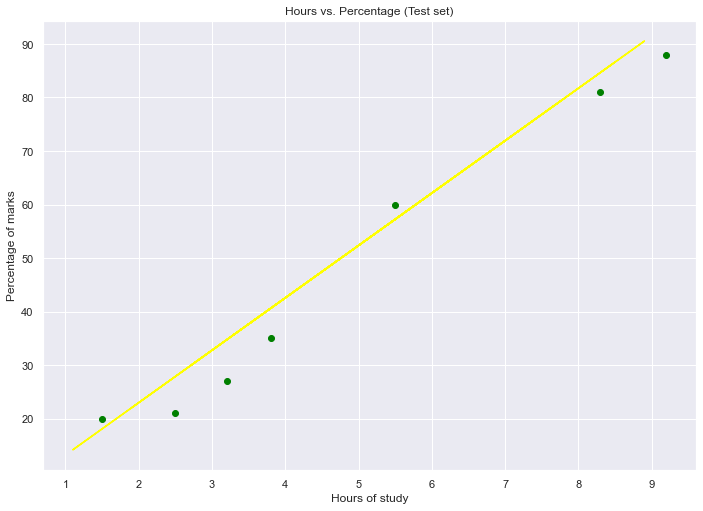

In [88]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, lr.predict(X_train), color = 'yellow')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours of study')
plt.ylabel('Percentage of marks')
plt.show()

In [89]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(dataset.to_markdown())

|    |   Actual |   Predicted |
|---:|---------:|------------:|
|  0 |       35 |     40.5996 |
|  1 |       60 |     57.2438 |
|  2 |       20 |     18.081  |
|  3 |       88 |     93.4694 |
|  4 |       81 |     84.6578 |
|  5 |       27 |     34.7252 |
|  6 |       21 |     27.8717 |


In [90]:
dataset = np.array(7.25)
dataset = dataset.reshape(-1, 1)
pred = lr.predict(dataset)
print("If a student studies for 7.25 hours per day, the score is {}.".format(pred))

If a student studies for 7.25 hours per day, the score is [74.37754529].


# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error (RMSE)
# R Squared (R2)


In [91]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 4.856984875410573


In [92]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 27.546725152852122


In [93]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 5.248497418581067


In [94]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9610742434972386
